In [1]:
def check_float(textin):
    try:
        float(textin)
        return True

    except ValueError:
        return False

def check_force(folder):
    import os
    import numpy as np
    files = os.listdir(folder)
    cleaned = [float(x) for x in files if check_float(x)]
#     print(cleaned)
#     print(np.max(cleaned))
    if os.path.exists(folder+"/postProcessing/forces/{}".format(np.max(cleaned))):
        return False
    else:
        return True
    
def retrieve_lift(folder,latest=False):
    import os
    import shutil
    import numpy as np
    
    files = os.listdir(folder)
    cleaned = [x for x in files if check_float(x)]
    files = sorted(cleaned)
    needs_forces = check_force(folder)
#     print(needs_forces)
    if needs_forces:
        force_command = "rhoSimpleFoam -postProcess -case {} -func forces".format(folder)
        if latest == True:
            force_command = force_command + " -latestTime"
        os.system(force_command)
    else:
        pass
    
    forces = np.zeros(3)
    moments = np.zeros(3)
    time = np.array([])
    
    for file in files:    
        with open("{}/postProcessing/forces/{}/forces.dat".format(folder,file)) as f:
            full = f.readlines()
            line = full[3]
            starts = []
            ends = []
            for i in range(len(line)):
                if line[i] == '(' and line[i+1] != '(':
                    starts.append(i+1)
                elif line[i] == ')' and line[i-1] != ')':
                    ends.append(i)
            pressure_forces = np.array([float(x) for x in line[starts[0]:ends[0]].split()])
            viscous_forces = np.array([float(x) for x in line[starts[1]:ends[1]].split()])

            pressure_moments = np.array([float(x) for x in line[starts[2]:ends[2]].split()])
            viscous_moments = np.array([float(x) for x in line[starts[3]:ends[3]].split()])
            forces = np.vstack([forces, pressure_forces + viscous_forces])
            moments = np.vstack([moments, pressure_moments + viscous_moments])
            time = np.append(time,float(file))
    return forces, moments, time

def retrieve_lift_visc(folder,latest=False):
    import os
    import shutil
    import numpy as np
    
    files = os.listdir(folder)
    cleaned = [x for x in files if check_float(x)]
    files = sorted(cleaned)
    needs_forces = check_force(folder)
#     print(needs_forces)
    if needs_forces:
        force_command = "rhoSimpleFoam -postProcess -case {} -func forces".format(folder)
        if latest == True:
            force_command = force_command + " -latestTime"
        os.system(force_command)
    else:
        pass
    
    forces = np.zeros(3)
    moments = np.zeros(3)
    time = np.array([])
    
    for file in files:    
        with open("{}/postProcessing/forces/{}/forces.dat".format(folder,file)) as f:
            full = f.readlines()
            line = full[3]
            starts = []
            ends = []
            for i in range(len(line)):
                if line[i] == '(' and line[i+1] != '(':
                    starts.append(i+1)
                elif line[i] == ')' and line[i-1] != ')':
                    ends.append(i)
            pressure_forces = np.array([float(x) for x in line[starts[0]:ends[0]].split()])*0
            viscous_forces = np.array([float(x) for x in line[starts[1]:ends[1]].split()])

            pressure_moments = np.array([float(x) for x in line[starts[2]:ends[2]].split()])
            viscous_moments = np.array([float(x) for x in line[starts[3]:ends[3]].split()])
            forces = np.vstack([forces, pressure_forces + viscous_forces])
            moments = np.vstack([moments, pressure_moments + viscous_moments])
            time = np.append(time,float(file))
    return forces, moments, time

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt

directory = '/media/james/Data/james/completed_cases/bezier_airfoils/test1/'
cases = os.listdir(directory)
data_dict = {}
for i in range(len(cases)):
    print(cases[i])
    data_dict[cases[i]] = retrieve_lift(directory+cases[i])


test
[0.0, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002, 0.0021, 0.0022, 0.0023, 0.0024, 0.0025, 0.0026, 0.0027, 0.0028, 0.0029, 0.003, 0.0031, 0.0032]
0.0032
True
/*---------------------------------------------------------------------------*\
  =========                 |
  \\      /  F ield         | OpenFOAM: The Open Source CFD Toolbox
   \\    /   O peration     | Website:  https://openfoam.org
    \\  /    A nd           | Version:  10
     \\/     M anipulation  |
\*---------------------------------------------------------------------------*/
Build  : 10-c4cf895ad8fa
Exec   : rhoSimpleFoam -postProcess -case /media/james/Data/james/completed_cases/bezier_airfoils/test1/test -func forces
Date   : Apr 07 2023
Time   : 12:11:34
Host   : "james-power"
PID    : 386866
I/O    : uncollated
Case   : /media/james/Data/james/completed_cases/bezier_airfoils/test1/test
nProcs : 1


Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM Warning : Creating fvModels from "system/fvOptions" rather than constant/fvModels
No fvModels present
--> FOAM Warning : Creating fvConstraints from "system/fvOptions"

Selecting finite volume constraint type limitTemperature
    Name: limitT
    - selecting all cells
    - selected 86400 cell(s) with volume 1491.89
forces forces:
    Not including porosi

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM Warning : Creating fvModels from "system/fvOptions" rather than constant/fvModels
No fvModels present
--> FOAM Warning : Creating fvConstraints from "system/fvOptions"

Selecting finite volume constraint type limitTemperature
    Name: limitT
    - selecting all cells
    - selected 86400 cell(s) with volume 1491.8

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM Warning : Creating fvModels from "system/fvOptions" rather than constant/fvModels
No fvModels present
--> FOAM Warning : Creating fvConstraints from "system/fvOptions"

Selecting finite volume constraint type limitTemperature
    Name: limitT
    - selecting all cells
    - selected 86400 cell(s) with volume 1491.8

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM Warning : Creating fvModels from "system/fvOptions" rather than constant/fvModels
No fvModels present
--> FOAM Warning : Creating fvConstraints from "system/fvOptions"

Selecting finite volume constraint type limitTemperature
    Name: limitT
    - selecting all cells
    - selected 86400 cell(s) with volume 1491.8

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM Warning : Creating fvModels from "system/fvOptions" rather than constant/fvModels
No fvModels present
--> FOAM Warning : Creating fvConstraints from "system/fvOptions"

Selecting finite volume constraint type limitTemperature
    Name: limitT
    - selecting all cells
    - selected 86400 cell(s) with volume 1491.8

Reading/calculating face flux field phi

Creating turbulence model

Selecting turbulence model type RAS
Selecting RAS turbulence model SpalartAllmaras
Selecting patchDistMethod meshWave
RAS
{
    model           SpalartAllmaras;
    turbulence      on;
    printCoeffs     on;
    sigmaNut        0.66666;
    kappa           0.41;
    Cb1             0.1355;
    Cb2             0.622;
    Cw2             0.3;
    Cw3             2;
    Cv1             7.1;
    Cs              0.3;
}

Creating thermophysical transport model

Selecting thermophysical transport type RAS
Selecting default RAS thermophysical transport model unityLewisEddyDiffusivity
No MRF models present

--> FOAM Warning : Creating fvModels from "system/fvOptions" rather than constant/fvModels
No fvModels present
--> FOAM Warning : Creating fvConstraints from "system/fvOptions"

Selecting finite volume constraint type limitTemperature
    Name: limitT
    - selecting all cells
    - selected 86400 cell(s) with volume 1491.8

In [49]:
import os
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook
N_startup = 50
folders = os.listdir(directory)
numfold = []
for i in folders:
    numfold.append(int(i[:-2]))
numfold = np.array(numfold)
sorted_nums = np.sort(numfold)
sortind = np.argsort(numfold)
folders = [folders[i] for i in sortind]
numfold = numfold[sortind]
rad = numfold * np.pi / 180
lift = np.array([])
drag = np.array([])
for i in range(len(folders)):    
    forces, moments, time = data_dict[folders[i]]
    lift = np.append(lift,forces[2,1]*np.cos(rad[i])-forces[2,0]*np.sin(rad[i]))
    drag = np.append(drag,forces[2,0]*np.cos(rad[i])+forces[2,1]*np.sin(rad[i]))
CL = lift / (1.17 * 20**2 * .5)
CD = drag / (1.17 * 20**2 * .5)
    
ind = np.arange(1,19)
taf = rad[1:19] * 2 * np.pi
plt.plot(numfold[1:19],CL[1:19],'--*')
plt.grid(which='both')

for i in ind:
    plt.text(numfold[i]+.5,CL[i],'{}'.format(np.around(CL[i],3)))
    
plt.figure()
plt.plot(numfold[ind],CD[ind],'--x')
plt.grid(which='both')
for i in ind:
    plt.text(numfold[i]+.5,CD[i],'{}'.format(np.around(CD[i],3)))
            


ValueError: invalid literal for int() with base 10: 'unstdy_20mps_plen'

In [195]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
temps = [float(i) for i in cases]
forcev  = [data_dict[case][0] for case in cases]
forcev = np.array(forcev)
xfv = forcev[:,2,0]
zfv = forcev[:,2,1]

force  = [data_dict_full[case][0] for case in cases]
force = np.array(force)
xf = force[:,2,0]
zf = force[:,2,1]

print(np.max(drag)-np.min(drag))
dragv = xfv * np.cos(aoa*np.pi/180) + zfv*np.sin(aoa*np.pi/180)
dragv = dragv/(0.5*1.17*35**2)
plt.figure()
plt.plot(temps,dragv)

drag = xf * np.cos(aoa*np.pi/180) + zf * np.sin(aoa*np.pi/180)
dragp = (drag - dragv)/(0.5*1.17*35**2)

plt.figure()
plt.plot(temps,dragp)

KeyError: '300.0'

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
aoa = np.linspace(0,13,14)
data_dict = {}
data_dict_p = {}
data_dict_full = {}
dirs=[]
for k in range(len(aoa)):    
    print(aoa[k])
    directory = '/media/james/Data/james/completed_cases/bezier_airfoils/temps/{}/'.format(aoa[k])
    cases = os.listdir(directory)
    for i in cases:
        if check_float(i):
            dirs.append(i)
    data_dict={}
    for i in range(len(dirs)):
        data_dict[dirs[i]] = retrieve_lift_visc(directory+dirs[i])
        data_dict_p[str(aoa[k])] = retrieve_lift(directory+dirs[i])
        data_dict_full[str(aoa[k])] = data_dict

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0


In [9]:
xfv = np.zeros([len(aoa),len(cases)])
zfv = np.zeros([len(aoa),len(cases)])
dragv = np.zeros([len(aoa),len(cases)])
drag = np.zeros([len(aoa),len(cases)])
for j in range(len(aoa)):
    temps = ([float(i) for i in cases])
    data_dict = data_dict_full[str(aoa[j])]
    forcev  = [data_dict[case][0] for case in cases]
    forcev = np.array(forcev)
    xfv[j,:] = forcev[:,2,0]
    zfv[j,:] = forcev[:,2,1]
    dragv[j,:] = xfv[j,:] * np.cos(aoa[j]*np.pi/180) + zfv[j,:]*np.sin(aoa[j]*np.pi/180)
    drag300 = dragv[j,0]
    dragv[j,:] = (drag300-dragv[j,:])/(0.5*1.17*35**2)
#     plt.figure()
#     plt.plot(temps,dragv[j,:])
    
print(dragv)
    

    
    


[[0.00000000e+00 2.84220337e-05 5.54440181e-05 8.11636421e-05
  1.05678594e-04 1.29076466e-04 1.51439917e-04 1.72837047e-04
  1.93332669e-04 2.12984552e-04 2.31849523e-04 2.49974549e-04
  2.67403777e-04 2.84182295e-04 3.00344622e-04 3.15927391e-04]
 [0.00000000e+00 2.84342172e-05 5.54625958e-05 8.11894838e-05
  1.05710004e-04 1.29112898e-04 1.51477199e-04 1.72874849e-04
  1.93372107e-04 2.13027419e-04 2.31893556e-04 2.50019738e-04
  2.67452346e-04 2.84231844e-04 3.00397279e-04 3.15984383e-04]
 [0.00000000e+00 2.84802579e-05 5.55578936e-05 8.13310705e-05
  1.05897509e-04 1.29346228e-04 1.51754618e-04 1.73193077e-04
  1.93726669e-04 2.13415387e-04 2.32315839e-04 2.50474943e-04
  2.67937931e-04 2.84744954e-04 3.00935681e-04 3.16544947e-04]
 [0.00000000e+00 2.85772646e-05 5.57447755e-05 8.16001247e-05
  1.06242708e-04 1.29760328e-04 1.52230755e-04 1.73726440e-04
  1.94314326e-04 2.14053279e-04 2.32996910e-04 2.51195035e-04
  2.68694462e-04 2.85535699e-04 3.01757496e-04 3.17394829e-04]
 [0.

<IPython.core.display.Javascript object>


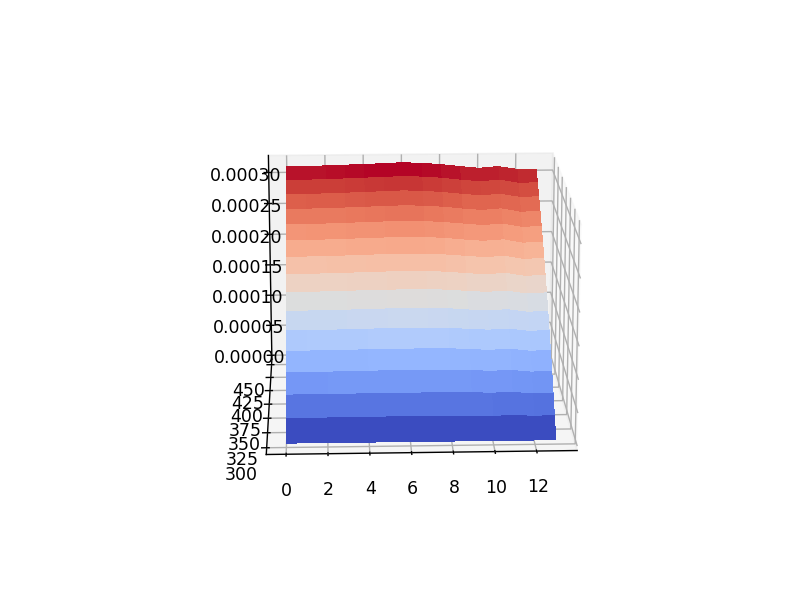

In [10]:
from matplotlib import pyplot as plt
from matplotlib import cm
import numpy as np
%matplotlib notebook
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

X,Y = np.meshgrid(aoa,temps)
Z = dragv.T

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
